In [1]:
import pandas as pd; import sys
import matplotlib.pyplot as plt
import numpy as np
import datetime
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 100
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.weightstats import ztest, ttest_ind
from scipy.stats import spearmanr, pearsonr, kendalltau
from scipy import stats
from scipy.stats import ttest_ind as ttest_ind_from_scipy,  boxcox
import seaborn as sns
from statsmodels.stats.power import tt_ind_solve_power
from scipy.stats import kstest
import sklearn
import eda_tools as eda
import imp
import help_tools as ht
display(HTML("<style>.container { width:100% !important; }</style>"))

<u>Полезные ссылки</u>  
  
https://www.youtube.com/@Прикладнаястатистика  
https://github.com/FUlyankin/matstat-AB/tree/main/week01_intro (репозиторий к урокам выше)
  
https://habr.com/ru/articles/351400/ - статья по основам вероятностей

#### Случайные величины

<u>Основные термины анализа случайных величин</u>  
Генеральная совокупность - полная изучаемая совокупность объектов, в пределе бесконечная (например, клиенты магазина при t -> inf)  
Метрики - числовые значения приписываемые объектам обладающие бизнесовым смыслом (например, выручка от клиента за неделю)  
Статистика - агрегирующая функция над метриками объектов (например, средняя выручка на клиента)    
Выборка = случайный семпл из генеральной совокупности длины N; выборочая статистика T = T(x1, ... xN)  
Ключевая задача - по выборочной статистике TN сделать выводы о статистике генеральной совокупности T.  
Репрезентативность - обобщаемость используемой выборки на всю генеральную совокупность.  
При нестационарном поведении генеральной совокупности во времени необходимо случайно семплировать выборку для теста также по времени  
  
Случайная величина = СВ - функция X которая принимает на вход случайный объект (или некоторую ситуацию) и сопоставляет ему число.  
Таким образом x = X(obj). Например, выручка клиента X = X(случ. клиент) = СВ. Статистика T = T(x1, ...) также СВ.  
  
<u>Свойства случайных величин</u>  
Ключевые описательные статистики для случайной величины X:
- математическое ожидание выборки M(x) = p1 * x1 + p2 * x2 + ... = (x1 + ... + xN)/N при p=const  
- дисперсия Var(X) = M((x - M)^2)
- стандартное отклонение std(X) = sqrt(Var)
- квантиль q(X, alpha) = q такое, что len(X[X < alpha]) / len(X) = q; медиана = квантиль 50
  
Независимые СВ - величины X, Y такие что P(X, Y) = P(X) * P(Y|X) = P(X) * P(Y)  
Для независимых величин работают теоремы сложения и умножения вероятностей  
  
M(X + Y) = M(X) + M(Y)  
M(const * X) = const * M(X)  
M(X * Y) = SUM(X * Y * P(X, Y)); P(X, Y) - совместная вероятность появления величин  
Для независимых СВ: M(X * Y) = M(X) * M(Y)  
  
VAR(X + Y) = VAR(X) + VAR(Y) + 2 * cov(X, Y)  
cov = M((X - M(X))(Y - M(Y)) = ковариация (совместная вариация X, Y вокруг M)  
Для независимых СВ: cov(X, Y) = 0 -> VAR(X + Y) = VAR(X) + VAR(Y)  
VAR(const * X) = const^2 * VAR(X)  
  
PS. cov(X, X) = VAR(X); корреляция corr(X, Y) = cov(X, Y) / sqrt(VAR(X) * VAR(Y)) = безразмерная величина (-1;1)
    
Средневыборочное AVG - статистика по выборке x1, ... xN: AVG = SUM(X)/N  
Среднее средневыборочного M_avg = M(SUM(X)/N)) = M  
(!) В данном контексте под матожиданием понимаем средневзвешенное СВ по генеральной совокупности  
Дисперсия средневыборочного M_var = VAR(SUM(X)/N) = N * VAR / N^2 = VAR / N  
std_var = SE (standart error) = std / sqrt(N)  
  
<u>Оценки случайных величин</u>  
Оценка случайной величины = статистика над выборкой, примерно оценивающая неизвестный параметр генеральной совокупности  
Если не знаем параметр T, то его оценка T_est = T_est(x1, ... xN).  
Пример: не знаем матожидание M генеральной совокупности, T_est = AVG(x1, ... xN) исходя из формул выше.    
Можем оценивать различные численные параметры генеральной совокупности вроде матожидания, дисперсии, долей, квантилей итд.  
  
<u>Свойства выборочных оценок</u>  
В зависимости от того какие будут попадаться выборки (СВ) - T_est будет иметь некоторое распределение.  
Хорошие оценки T_est обладают следующими свойствами:  
  
1. Несмещенность. M(T_est) = T. Матожидание распределения T_est равно T генеральной совокупности.  
Следствие этого, при бесконечном кол-ве выборок усредненное по ним T_est -> T (нет систематической ошибки)  
PS. Асимптотическая несмещенность. M(T_est, N -> inf) -> T.  
2. Состоятельность. VAR(T_est, N -> inf) -> 0. Дисперсия распределения T_est сокращается с ростом выборок N.  
Т.е если возьмем 1000 выборок длины 100, построим по ним распределение T_est, оно будет шире, чем по 1000 выборок длины 1000 итд.  
3. Эффективность. VAR = VAR_min(T_est1, ... T_estK). Распределение T_est среди семейства всех несмещенных оценок имеет минимальную дисперсию  
  
Виды оценок: точечные и интервальные. Интервальные - когда для оценки используется два числа A, B такие что A < T < B с некоторой вероятностью.  
  
<u>Степень свободы</u>  
df = degrees of freedom = кол-во переменных от которых зависит статистика T и которые могут независимо изменяться при сохранении статистики.  
Пример: T = x1^ 2 + x2^2 + ... xn^2. Это вектор, где T - его длина. Данный вектор имеет N-1 степень свободы  
Для T-теста Стьюдента и выборок длины n1, n2: df = (n1 - 1) + (n2 - 1) = n1 + n2 - 2 (так как участвуют средние по двум выборкам)  
Чем больше степень свободы, тем меньше колебания итоговой статистики на разных выборках -> точнее оценка  
  
<u>Bias Variance trade off</u>  
Пусть у нас есть оценка T_est и мы хотим оценить ее качество через функцию потерь, усредняя по выборкам:  
MSE = AVG((T_est - T)^2) = AVG((T_est - AVG(T_est) + AVG(T_est) - T)^2) = ... = VAR(T_est) + BIAS^2  
Здесь BIAS = AVG(T_est) - T = смещенность оценки. Итак, MSE = VAR + BIAS^2.  
Формула выражает дилемму смещения и разброса. Для одинаково качественных по MSE оценок - рост их разброса  
вызывает снижение смещения и наоборот. Объяснение из ML:  
чем умнее модель, тем меньше BIAS, но тем выше нестабильность при варьировании выборки -> растет VAR.  


In [3]:
# дисперсия средневыборочного по случайной выборке длины N
x = stats.norm.rvs(scale=5, size=10000) # СВ
N = 500 ; print(np.std([np.mean(np.random.choice(x, N)) for _ in range(1000)]), np.std(x) / np.sqrt(N))

0.22312549953503333 0.2234492233684627


In [ ]:
# пример несмещенной состоятельной оценки - среднее арифметическое по выборке
# смотрим на смещение и разброс семплируемой оценки
real_mean = 10; total = stats.norm.rvs(loc=real_mean, size=1000)
def sample_mean_bias_std(total, sample_size):
    sample_mean_list = []
    for j in range(1000):
        sample_mean_list.append( np.mean(np.random.choice(total, sample_size, replace=True)) )
    return np.mean(sample_mean_list) - np.mean(total), np.std(sample_mean_list)
print(100, sample_mean_bias_std(total, sample_size=100))
print(1000, sample_mean_bias_std(total, sample_size=1000))

#### Закон больших чисел (ЗБЧ) и Центральная предельная теорема (ЦПТ)

<u>Условие i.i.d</u>  
independent and identically distributed = условие на группу случайных величин, когда каждое из СВ  
имеет схожее с остальными распределения и сами события независимы. Далее в основном будем работать со статистиками над этими величинами.  

<u>Закон больших чисел</u>  
при n -> inf среднее арифметическое одинаково распределенных независимых (i.i.d.) случайных величин xi сходится к их матожиданию.  
Y = (x1 + ... + xn)/n -> M(x). Это следует из неравенства Чебышева, интуиция: VAR(Y) = VAR(x)/sqrt(n) -> 0  
С ростом числа n дисперсия средневыборочного сходится к нулю, само средневыборочное M(x) - следует из законов матожидания и дисперсии сумм СВ.  
Одно из следствий: доля положительных исходов n/m -> (m->inf) p = p(n)/p(m). Частотная вероятность выборки сходится к классической при больших n.    
  
<u>Центральная предельная теорема</u>  
СВ Y = x1 + x2 + ... xn , где группа xi - i.i.d, при n -> inf стремится к нормальному распределению N(mu_Y, std_Y).  
mu, std - матожидание и дисперсия средневыборочного Y. mu_Y = mu, std_Y = std_X / sqrt(n).  
Соответственно, чем выше n, тем меньше std_Y - распределение сжимается и в пределе наблюдается сходимость Y -> mu (ЗБЧ).  
ЦПТ - расширяет закон больших чисел, указывая асимптотическую форму распределения для средневыборочного.  
Доказательство ЦПТ из характеристических функций = по сути Фурье преобразование для сложной СВ Y. Гаусс здесь - это его спектр.    
  
Ограничения ЦПТ:  
- выборка для средневыборочного i.i.d  
- средневыборочная дисперсия конечна VAR -> 0. На практике, VAR мала для некоторого n с которого начинается асимптотика.  
- достаточно большое n (как раз чтобы VAR ~ 0)
  
Проблема выбросов: когда в выборке присутствуют выбросы x_outl, то для недостаточно больших n средневыборочная будет отлична от нуля,  
поэтому будут сильные флуктуации, что помешает сходимости Y к нормальному распределению. Скорость сходимости вообще зависит  
от формы распределения x.  

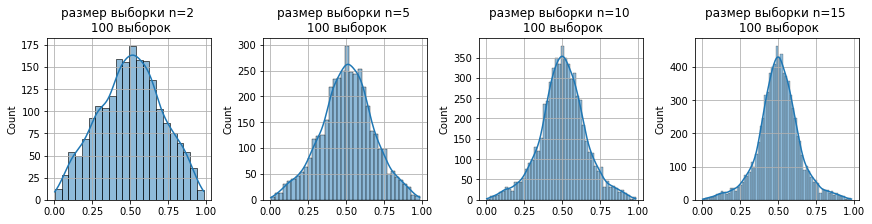

In [17]:
mu, std = 0, 1 # матожидание с отклонение для рандомных x
y_list = [] # массив для средневыборочных
ax = eda.get_subplots((12, 3), 1, 4); i = 0

for n in (2, 5, 10, 15): # размер выборки для оценки средневыборочного
    for j in range(2000): # кол-во выборок для семплирования
        y_list.append(np.mean(stats.uniform.rvs(loc=mu, scale=std, size=n)))
    eda.make_plot('hist', {'x' : y_list, 'kde' : True, 'title' : f'размер выборки n={n} \n 100 выборок', 'ax' : ax[i]})
    i+=1

#### Распределения случайных величин

<u>Описание распределений</u>  
Пусть y - СВ. F_y(x) = P(y < x) = функция распределения = указывает для каждого x вероятность что y < x. В пределе F(inf) = 1.  
Плотность распределения = f_y(x) = функция описывающая объем вероятностной массы y в окрестности каждого значения x.  
F(x) = integral(f(x)dx). f(x) > 0.  
Для дискретных величин плотность распределения может задаваться гистограмой (функция вероятности P(x))  
в пределе она переходит в некоторую кривую.  
  
<u>Распределения и статистические тесты</u>  
В следующем разделе по Статистическим тестам мы будем проверять гипотезы касательно различных выборочных статистик.  
Зная как распределены выборочные статистики (т к это СВ), можно делать рассуждения касательно параметров генеральной совокупности  
(в том числе осуществлять точечные и интервальные оценки)
  
<u>Схема Бернулли</u>  
Пусть есть некоторое испытание. Вероятность успеха в нем p, неуспеха 1-p.  
x = 1 когда успех, 0 когда не успех = СВ. M(x) = 1 * p + 0 * (1-p) = 0; VAR(x) = p * (1-p) 
  
<u>Биномиальное распределение</u>  
Пусть есть n испытаний, вероятность успеха в каждом p. Тогда Y = кол-во успехов n испытаниях = СВ.  
У нее биномиальное распределение. P(Y) = C(Y|n) * p^Y * (1-p)^(n-Y)  
C(Y|n) = сочетание из n по Y (см Комбинаторика).  
Интуиция: чтобы реализовалось Y: должна Y раз произойти  удача p и (n-Y) неудача (1-p)  
Все это может перемешиваться в порядке C способами.  
Y = x1 + ... xn, где xi - СВ по схеме Бернулли (т.к Y = 1 + 1 + 0 + ... = кол-во удач).  
M(Y) = n * p; VAR(Y) = VAR(x1) + VAR(x2) + ... = n * VAR(x) = n * p * (1-p)  
  
<u>Распределение Пуассона</u>  
Предельный случай биномиального распределения, когда n -> inf, p * n = mu = const.  
Кол-во успехов P(x = k) = mu^k * exp(-mu) / k!  
Распределение описывает вероятность наступления k событий при условии что в среднем за некоторый  
интервал времени они наступают с фиксированной частотой mu = p * n.  
Пример: кол-во звонков в call центр за день. Зная среднее кол-во звоноков, если оно постоянно,  
можно оценить вероятностное распределение их конкретного кол-ва в этот день P(x=k).  
  
<u>Нормальное распределение</u>  
Как обсудили в разделе с ЦПТ: Y = x1 + x2 + ... xn при x=i.i.d и достаточно большом n: Y ~ N(mu, std)  
Биномиальное распределениe Y = x1 + ... + xn схем Бернулли при большом n также сходится к нормальному.  
f(x) = exp(-(x - mu)^2 / 2 * var) / sqrt(2pi * var), где var = std^2.  
Это кривая Гаусса, симметричная с не очень широкими хвостами.  
  
<u>Хи квадрат распределение</u>  
Статистика chi_sq = x1^2 + x2^2 + ... xn^2 , где xi ~ N(mu, std); xi = i.i.d  называется хи квадрат распределением с df=n    
При df -> inf по ЦПТ очевидно chi_sq -> нормальному распределению N  
Хи квадрат распределение используется в стат тестах связанных с дисперсией (VAR ~ X^2), а также в тестах на согласие:   
близостью распределений друг к другу (метрики расстояний вроде MSE = (y1 - y2)^2 при delta_y ~ N)  
  
<u>Распределение Стьюдента (t-dist)</u>  
Статистика T = (mu2 - mu1) / sqrt(var1 + var2) для сравнения средневыборочных двух выборок распределена по T-стюдента.  
T ~ N / chi_sq. Здесь mu, var - параметры средневыборочных для двух выборок.  
df = n1 - 1 + n2 - 1 = n1 + n2 - 2; единица вычитается так как в оценках фигурирует среднее, которое есть линейная комбинация выборки.  
Частный случай: сравнений пропорций p1/q1 , p2/q2 где mu=p; std = p * q (схема Бернулли)  
  
<u>Распределение Фишера</u>  
Статистика F = (chi_sq_n1 / n1 ) / (chi_sq_n2 / n2) имеет распределение Фишера (или F распределение)  
В пределе F -> N1/N2 ~ N также распределено нормально (потому что частное норм распределений нормальное)  
Возникает в задаче сравнения двух дисперсий F = var2 / var1 = (std1^2 / n1) / (std2^2 / n2)  
В расширенном виде используется в ANOVA - поиск различия в группах наблюдений по дисперсиям.  
Также используется при проверки значимости признаков в моделях - сравнение объясняемых моделью вариаций.  
В регрессионных моделях RSS = квадраты остатков также распрелены как хи квадрат.  
  
<u>Логнормальное распределение</u>  
Логнормальное распределение - это когда логарифм случайной величины распределен нормально.  
Пусть случайная величина Y = x1 * x2 * ... xn, где xi = i.i.d; Тогда lnY = ln(x1) + ... + ln(xn)  
При n -> inf получаем, что lnY ~ N(mu, std). Тогда Y ~ log_N  
Логнормально распределены величины, мультипликативно зависящие от случайных составных факторов.  
Пример: рост доходов. Часто доход Y = X0 * r1 * r2 ... , где X1 - исходный доход, а ri - случайные  
множители отражающие факторы вроде инфляции, политики компании по росту, премиям и пр.  
Если таких составных множителей очень много, то итоговая Y распределяется логнормально.  
PS. Модель процентов от предыдущих состояний (доход растет процентно от предыдущего) мультипликативная.  

<u>Геометрическое распределение</u>  
Это распределение случайной величины n, отражающей вероятность успеха на n попытку в повторяющейся  
схеме Бернулли. Предположим, что вероятность успеха события p, не успеха q = 1 - p  
Вероятность получить успех на n-й иттерации: p(n) = p * q^(n-1). Пример: выбросить 1 ну кубике на 5 бросок.  
Отсюда n_avg = ср кол-во попыток до первого успеха = sum(n * p(n)) = p * (1 + 2q + 3q^2 + ...)  
Геометр. прогрессия S = 1 + q + q^2 + ... = 1 / (1 - q) = 1/p для q<1. При этом S' = 1 + 2q + ... = 1/p^2  
Таким образом n_avg = p * S = 1 / p.  
    
---
TODO гипергеометрическое, полиномиальное (обобщение биномиального, бутстрап)

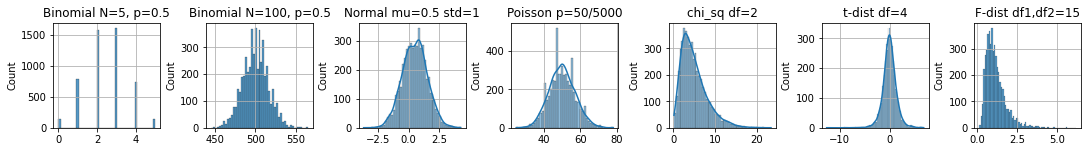

In [34]:
ax = eda.get_subplots((15, 2), 1, 7)
eda.make_plot('hist', {'x' : stats.binom.rvs(n=5, p=0.5, size=5000), 'ax' : ax[0], 'title' : 'Binomial N=5, p=0.5'})
eda.make_plot('hist', {'x' : stats.binom.rvs(n=1000, p=0.5, size=5000), 'ax' : ax[1], 'title' : 'Binomial N=100, p=0.5'})
eda.make_plot('hist', {'x' : stats.norm.rvs(loc=0.5, scale=1, size=5000), 'ax' : ax[2], 'kde' : True, 'title' : 'Normal mu=0.5 std=1'})
eda.make_plot('hist', {'x' : stats.poisson.rvs(mu=50, size=5000), 'ax' : ax[3], 'kde' : True, 'title' : 'Poisson p=50/5000'})
eda.make_plot('hist', {'x' : stats.chi2.rvs(df=5, size=5000), 'ax' : ax[4], 'kde' : True, 'title' : 'chi_sq df=2'})
eda.make_plot('hist', {'x' : stats.t.rvs(df=4, size=5000), 'ax' : ax[5], 'kde' : True, 'title' : 't-dist df=4'})
eda.make_plot('hist', {'x' : stats.f.rvs(dfn=15, dfd=15, size=5000), 'ax' : ax[6], 'title' : 'F-dist df1,df2=15'})

#### Статистические тесты

<u>Основная теория</u>  
Стат тест - процедура проверки некоторой нулевой гипотезы касательно параметров или распределений.  
Нулевая гипотеза - обычно утверждение об отсутствии различий (средних, дисперсий, двух распределений и пр)  
Альтернативная гипотеза - сравниваемое больше/меньше или в целом отличается (двух или односторонние гипотезы)  
В АБ тестах отклонение нулевой гипотезы = прокрас (есть значимое различие).  
Ошибки первого и второго рода - вероятности ложного прокраса и ложного непрокраса.  
Ошибка первого рода = уровень значимости, второго рода = betta. power = 1 - betta = мощность критерия, чувствительность.  
p_val = вероятность отклонить нулевую гипотезу по выборочным данным когда на самом деле она верна.  
Когда p_val < alpha, то на уровне alpha-значимости мы отклоняем нулевую гипотезу (=есть стат различие)  
  Доверительные интервалы - случайные числа a,b такие, что оцениваемое значение T из генеральной совокупности с  
вероятностью 1 - alpha лежит между ними.  
  
---
<u>КРИТЕРИИ О СРЕДНИХ</u>  
<u>Тест Стьюдента (T-test)</u>  
Критерий сравнения средних двух выборок T = (mu2 - mu1) / sqrt(var2 + var1)  
Бывает полезен в ab тестах где необходимо сравнивать средние метрики двух выборок.  
Позволяет оценивать также доверительные интервалы. Работает когда mu1, mu2 распределены нормально (ЦПТ).     
  
<u>Критерий Манна Уитни</u>  
Данный критерий не касается средних, но проверяет стохастическое доминирование одной выборки над другой в  
условиях когда T-тест не работает (средневыборочные распределены не нормально).  
Стохастическое доминирование - вероятность, что случайно выбранное значение из выборки X > случайного из Y.  
Идея: объединяем выборки, сортируем, назначаем каждому семплу свой порядковый ранг.  
Вычисляем статистику U = U(n1, n2, R1, R2), n - размеры выборок, R - суммы рангов.  
Она показывает сколько раз элементы одной выборки больше по рангам чем элементы другой.  
При n->inf U ~ N. Оцениваем по U имеется ли отличиие в распределении рангов.  
PS. В частном случае когда два распределения X, Y одинаковы по формуле и отличаются только сдвигом -  
тест позволяет сказать об отличии двух медиан.  
  
<u>ANOVA</u>  
ANOVA = analysis of variation = расширение попарного критерия о средних на группу СВ x1, x2, ... xn.  
Проверяется гипотеза: в данной выборке существует хотя бы пара СВ у которых средние отличаются.  
Значительно мощнее чем группа попарных t-тестов с коррекцией на множественное сравнение (см тетрадь AB).  
  
Объединим выборки total = append(x1, x2, ... xn).    
Пусть ss = sum of squares. Тогда var = avg(ss_group). ss_total = ss_between + ss_within  
ss_between = межгрупповая сумма = разброс mu_x1, mu_x2 ... относительно mu_total  
ss_within = внутригрупповая сумма = ssw1 + ssw2 + ...  sswn  
Если во всех группах x1, x2 ... одинаковые средние, тогда ssb = 0. В реальности же мы проверяем чтобы  
ssb был небольшим по сравнению с ssw (внутренний шум групп). Статистика F = ssb / ssw распределена по Фишеру.  
На самом деле смотрят F = avg(ssb) / avg(ssw) = (ssb/M) / (ssw / N-M), M = число групп, N - число семплов.  
  
Условия применимости: независимость, нормальность, гомоскедастичность xi (иначе не будет F-распределения).
  
one-way anova - проверка различия средних в группах x1, x2, ... которые отличаются каким то одним фактором  
например xi - это зарплаты сотрудников, а i - это предприятия в отрасли. Проверяем что i влияет на x.  
two-way anova - когда у нас есть матрица СВ x11, x12, ... xnm , где i,j - это два каких то фактора.  
проверяем здесь кроме того взаимодействие между этими факторами i, j   
Взаимодействие = когда степень влияния эффекта i зависит от эффекта j (и наборот).  
В two-way anova за это отвечает ss_interaction который также сравнивается с ssw.  


---
<u>ДИСПЕРСИОННЫЕ КРИТЕРИИ</u>    
<u>Гомоскедастичность</u>  
Гомоскедастичность - равенство дисперсий у разных случайных величин (aka группах).  
Играет роль в некоторых статистических методах - этого требует ANOVA, линейная регрессия (ошибки гомоскедаст).  
Кроме того гомоскедастичность временных рядов - одно из условий их стационарности (см. тетрадь Time Series)  
  
<u>Тест Фишера, F-test</u>  
Тест на проверку равенства дисперсий для двух случайных величин. Пусть СВ x1, x2 имеют дисперсии var1, var2.  
Статистика F = (n2 * var2) / (n1 * var1) имеет распределение Фишера, когда x1, x2 распределены нормально.    
  
<u>Критерий Барлетта</u>  
F-test можно расширить на несколько случайных величин (>2) = тест Барлетта.  
Также чувствителен к **нормальности** распределений, проверяет что среди СВ x1, x2, ... xn присутствует  
хотя бы одна пара с разными дисперсиями. Статистика Барлетта имеет распределение хи квадрат.  

<u>Критерий Левене</u>  
Аналог критерия Барлетта для выборок **без необходимости нормального** распределения.  
Идея: каждой СВ x1, x2, ... сопоставляется набор отклонений от среднего: x1 -> dx11, dx12, ...  
А дальше применяется ANOVA для проверки гипотезы равенства средних среди отклонений от средних в группах.  
Устойчивая модификация теста: dx = отклонение от медианы (также позволяет судить о дисперсиях)  
PS. Работает, так как дисперсия = среднее отклонений от среднего.  
  
---
<u>КРИТЕРИИ СОГЛАСИЯ</u>  
<u>Критерий Хи квадрат</u>  
Хотим проверить что два <u>выборочных</u> распредеделения случайных величин f1 и f2 идентичные.  
Имеем выборочные реализации этих распределений - по сути гистограммы с частотами f1 = f1(xi); x = 0, 1, 2, ... n = бины.  
Аналогично для f2. Тогда введем статистику H = SUM((f2 - f1)^2) / f1), сумма по всем бинам i  
Здесь f1, f2 = выборочные <u>частоты</u> реализации распределений в бине xi. Когда n->inf, ширина бина xi -> 0,  
в каждом бине частота f1(xi), f2(xi) -> 0, при этом mu(f1) = sum(xi * pi) = const. Это распределение Пуассона.  
Значит в пределе частоты f1, f2 распределены нормально. Тогда H = SUM(t-score1^2 + t-score2^2 + ...) = SUM(N1^2 + N2^2 ...) = chi_sq.  
Сумма относительных разниц частот H распределена как хи квадрат. Эта статистика - расстояние Пирсона.  
Критерий согласия хи квадрат:  
- берем выборки из исследуемых распределений f1, f2  
- накидываем сетку из большого кол-ва бинов, получаем набор частот f11, f12, ... f21, ... попадания в эти бины (гистограмма)  
- вычисляем по данным частотам H, проверяем по ней хи квадрат критерий (p_val, conf)  
  
Данных критерий лучше всего (из за бинаризации) использовать для дискретных распределений. Для непрерывных мощнее использовать  
критерии Колмогорова-Смирнова или Дарлинга-Андерсона
  
Частный случай: критерий соответствия частот ожидаемым.  
Пусть имеется некоторая таблица сопряженности - таблица совместного распределения двух номинативных величин.  
К примеру: приходящие покупатели разных сегментов (Y=S,M,L) как то попадают в ветки экспериментов (X = 1,2,3)  
Ожидаемые частоты = равномерное распределение, все бины в таблице сопряженности представлены равномерно.  
Теперь используя наблюдаемые частоты (Obs) и ожидаемые (Exp) можно вычислить статистику H и применить хи квадрат критерий.  
  
<u>KS. Критерий Смирнова-Колмогорова</u>  
Проверяет равенство двух выборочных распределений F1, F2 или соответствие выборочного распределения  
некоторому аналитическому F0. Вычисляется максимум отклонений двух выборок, которые подчиняются статистике KS.  
В частном случае можно использовать как критеррий проверки выборки на нормальность.  
  
<u>Критерий Андерсона-Дарлинга</u>  
Модификация критерия Колмогорова, где статистика T = интеграл квадрата разницы функций (по сути мера площади расхождения)  
нормированный на f * (1 - f) - то есть повышается вес в области где f = 0 и f = 1 (хвосты функции распределения)  
Таким образом, фокус равномерно распространяется на хвосты распределений, где обычно амплитуды меньше.  
  
<u>Критерий Шапиро-Уилка</u>  
Наиболее мощный критерий проверки на нормальность распределения F. При этом вычислительно сложный для больших n.  
Идея: сравнение квантилей теоретического распределения с наблюдаемым. Лучше использовать для n < 5k.  

In [73]:
# T-TEST. Проверка результатов для вычисления T-теста на случ выборках X, Y
X = np.random.normal(1, 2, 1000); Y = np.random.normal(1.3, 1, 1000)
print('less', ht.ttest_calc(X, Y, alternative='less'), stats.ttest_ind(Y, X, alternative = 'less').pvalue) # check
print('greater', ht.ttest_calc(X, Y, alternative='greater'), stats.ttest_ind(Y, X, alternative = 'greater').pvalue)
print('two-side', ht.ttest_calc(X, alternative='two-sided'), stats.t.interval(0.95, df=len(X)-1, loc=np.mean(X), scale=np.std(X, ddof=1)/np.sqrt(len(X))))

less ((-inf, 0.30463434777147014), 0.9999999979180496, 'less', None) 0.9999999980012535
greater ((0.3046343477714702, inf), 2.0819503898650282e-09, 'greater', None) 1.9987464365903034e-09
two-side (array([0.72283184, 0.97414058]), 0.0, 'two-sided', None) (0.7227689620734795, 0.9742034547057395)


In [83]:
# T-test касательно относительных доверительных интервалов
# грубая оценка относительного эффекта confint_abs/mean(control) -> confint_rel при выборках >7-8k
# при меньших выборках оценка confint_abs/mean(control) может оказаться уже реальной
n = int(7*1e3); X = np.random.normal(1, 2, n); Y = np.random.normal(1.3, 4, n)
print('bootstrap', ht.bootstrap_calc(X, Y, diff_type='rel', iter = 10**4)[0])
print('confint_abs / mean_1', ht.ttest_calc(X, Y)[0]/np.mean(X))
print('confint_relative', ht.ttest_calc(X, Y)[3])

bootstrap (0.1825051372138922, 0.4132748535876942)
confint_abs / mean_1 [0.18789771 0.40415089]
confint_relative ((0.1808657651469867, 0.4111828336677728), 4.698186238427885e-07)


In [82]:
# T-test рост мощности критерия для односторонних гипотез.  
# Пусть есть две выборки и мы ЗАРАНЕЕ знаем что avg(Y) > avg(X)
X = np.random.normal(1, 2, 1000); Y = np.random.normal(1.2, 1, 1000)
print('real diff = ', np.mean(Y) - np.mean(X))
print('two-side interval = ', ht.ttest_calc(X, Y, alternative='two-sided', alpha=0.05)[0])
print('greater interval = ', ht.ttest_calc(X, Y, alternative='greater', alpha=0.05)[0])

# Пусть есть две выборки и мы ЗАРАНЕЕ знаем что avg(Y) < avg(X)
X = np.random.normal(1, 2, 1000); Y = np.random.normal(0.8, 1, 1000)
print('real diff = ', np.mean(Y) - np.mean(X))
print('two-side interval = ', ht.ttest_calc(X, Y, alternative='two-sided', alpha=0.05)[0])
print('less interval = ', ht.ttest_calc(X, Y, alternative='less', alpha=0.05)[0])

real diff =  0.20764264106346675
two-side interval =  [0.06639244 0.34889284]
greater interval =  (0.08912474976194487, inf)
real diff =  -0.21755661959436778
two-side interval =  [-0.36016417 -0.07494907]
less interval =  (-inf, -0.0978994352868266)


In [152]:
# ANOVA. Одновыборочный критерий
# имеем некоторые метрики по городам, хотим понять одинаковые ли везде средние или есть отличия
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]
# petersburg = tillamook; tvarminne = newport # эмуляция когда у городов реально совпадают средние


# проверим нормальность данных используя критерий Шапиро (т к малые выборки)
p_val_list = []
for j in [tillamook, newport, petersburg, magadan, tvarminne]:
    p_val_list.append(stats.shapiro(j).pvalue)
decision_list = ht.multitest_calc(p_val_list, alpha_type='fwer', alpha=0.05)[0] # FWER = % хотя бы один прокрас
print(f'пар городов с распределением отличным от нормального {sum(decision_list)}')

# так как все распределения городов нормальные, можно использовать критерий барлетта проверки равенства дисперсий:
pval = stats.bartlett(tillamook, newport, petersburg, magadan, tvarminne).pvalue
print(f'равенство дисперсий по Барлетту, p_val = {pval}')

# на всякий случай выведем по Левене (не чувствителен к нормальности)
pval = stats.levene(tillamook, newport, petersburg, magadan, tvarminne).pvalue
print(f'равенство дисперсий по Левене, p_val = {pval}')

# теперь можно применять ANOVA
pval = stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne).pvalue
print(f'Наличие разности в средних по ANOVA: pval = {pval}')

пар городов с распределением отличным от нормального 0
равенство дисперсий по Барлетту, p_val = 0.6564670643021056
равенство дисперсий по Левене, p_val = 0.9744415772405349
Наличие разности в средних по ANOVA: pval = 0.0002812242314534544


In [171]:
# Хи квадрат критерий. Применение для оценки корректности сплитования аб тестов
# Пусть мы запустили a/b/c тест и ожидает сплит трафика поровну между ветками
real = [1000, 1070, 980] # если не указывать exp - то массив рассчитан поровну по веткам
ht.check_branch_balance(real)

'branch sizes valid p_val = 0.1112'

#### Статистичесие тесты. Симуляции

In [40]:
# Проверяемые ниже стат тесты
def stat_test_ttest_greater(metric_arr):
    alpha = 0.05
    p_value = ht.ttest_calc(metric_arr[0], metric_arr[1], alpha=alpha, alternative='greater')[1]
    return int(p_value < alpha)

def stat_test_ttest(metric_arr):
    alpha = 0.05
    p_value = ht.ttest_calc(metric_arr[0], metric_arr[1], alpha=alpha)[1]
    return int(p_value < alpha)

def stat_test_mannwhitneyu(metric_arr):
    alpha = 0.05
    _, p_value = mannwhitneyu(metric_arr[0], metric_arr[1])
    return int(p_value < alpha)

In [36]:
print('Доверительный интервал ошибок от кол-ва иттераций')
df1 = ht.simulate_test(stat_test_ttest, metric_size = 1000, metric_dist = 'normal', effect_range=[0, 0.01, 0.05, 0.1], metric_cnt = 2, iter_cnt = 500)
df2 = ht.simulate_test(stat_test_ttest, metric_size = 1000, metric_dist = 'normal', effect_range=[0, 0.01, 0.05, 0.1], metric_cnt = 2, iter_cnt = 2000)
df3 = ht.simulate_test(stat_test_ttest, metric_size = 1000, metric_dist = 'normal', effect_range=[0, 0.01, 0.05, 0.1], metric_cnt = 2, iter_cnt = 5000)
eda.display_df([df1, df2, df3])

Доверительный интервал ошибок от кол-ва иттераций


,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,4.6,"[2.76, 6.44]",,
1,0.01,,,93.4,"[91.22, 95.58]"
2,0.05,,,79.6,"[76.06, 83.14]"
3,0.10,,,42.2,"[37.86, 46.54]"
,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,4.85,"[3.91, 5.79]",,
1,0.01,,,94.5,"[93.5, 95.5]"
2,0.05,,,80.4,"[78.66, 82.14]"
3,0.10,,,41.6,"[39.44, 43.76]"
,effect_shift,type I error,type I error conf,type II error,type II error conf


In [43]:
print('t-test; t-test greater; mannwhitneyu')
df1 = ht.simulate_test(stat_test_ttest, metric_size = 1000, metric_dist = 'normal', effect_range=[0, 0.01, 0.05, 0.1], metric_cnt = 2, iter_cnt = 1000)
df2 = ht.simulate_test(stat_test_ttest_greater, metric_size = 1000, metric_dist = 'normal', effect_range=[0, 0.01, 0.05, 0.1], metric_cnt = 2, iter_cnt = 1000)
df3 = ht.simulate_test(stat_test_mannwhitneyu, metric_size = 1000, metric_dist = 'normal', effect_range=[0, 0.01, 0.05, 0.1], metric_cnt = 2, iter_cnt = 1000)
eda.display_df([df1, df2, df3])

t-test; t-test greater; mannwhitneyu


,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,5.3,"[3.91, 6.69]",,
1,0.01,,,93.3,"[91.75, 94.85]"
2,0.05,,,79.8,"[77.31, 82.29]"
3,0.10,,,37.8,"[34.79, 40.81]"
,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,4.9,"[3.56, 6.24]",,
1,0.01,,,91.8,"[90.1, 93.5]"
2,0.05,,,69.2,"[66.34, 72.06]"
3,0.10,,,27.3,"[24.54, 30.06]"
,effect_shift,type I error,type I error conf,type II error,type II error conf


In [73]:
print('Данные с выбросом; T-test VS mannwhitneyu')
def metric_dist(scale, loc, size): 
    # примесь выбросов = 10%
    if isinstance(size, tuple): # a/a batch
        size_outl = (int(0.1 * size[0]), size[1]) 
    else:
        size_outl = int(0.1 * size) # a/b branch
    return np.append(np.random.normal(loc = loc, scale=scale, size=size), np.random.normal(loc=500, size=size_outl))

df1 = ht.simulate_test(stat_test_ttest, metric_size = 1000, metric_dist = metric_dist, effect_range=[0, 0.01, 0.05, 0.1], metric_cnt = 2, iter_cnt = 1000)
df2 = ht.simulate_test(stat_test_mannwhitneyu, metric_size = 1000, metric_dist = metric_dist, effect_range=[0, 0.01, 0.05, 0.1], metric_cnt = 2, iter_cnt = 1000)
eda.display_df([df1, df2])

Данные с выбросом; T-test VS mannwhitneyu


,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,0,"[0.0, 0.0]",,
1,0.01,,,100,"[100.0, 100.0]"
2,0.05,,,100,"[100.0, 100.0]"
3,0.10,,,100,"[100.0, 100.0]"
,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,2.1,"[1.21, 2.99]",,
1,0.01,,,97.5,"[96.53, 98.47]"
2,0.05,,,88.5,"[86.52, 90.48]"
3,0.10,,,56.5,"[53.42, 59.58]"


In [89]:
# Гипотеза: среди группы веток x1,x2,.. xn есть хотя бы одна с отличным средним
# сравниваем попарный t-test с коррекцией; ANOVA 
# множественные сравнения без коррекции и с коррекцией
print('6 гипотез, pair tests = no adj, FDR adj, FWER adj; ANOVA')
def stat_test_pair_ttest_no_adj(metric_arr):
    pval_list = []
    metric_cnt = len(metric_arr)
    for i in range(metric_cnt):
        for j in range(metric_cnt):
            if i > j:
                pval_list.append(ht.ttest_calc(metric_arr[i], metric_arr[j])[1])
    return int(sum([int(j < 0.05) for j in pval_list]) > 0)


def stat_test_pair_ttest_fwer(metric_arr):
    pval_list = []
    metric_cnt = len(metric_arr)
    for i in range(metric_cnt):
        for j in range(metric_cnt):
            if i > j:
                pval_list.append(ht.ttest_calc(metric_arr[i], metric_arr[j])[1])
    pval_list = ht.multitest_calc(pval_list, alpha_type = 'fwer')[1] # holm
    return int(sum([int(j < 0.05) for j in pval_list]) > 0)

def stat_test_pair_ttest_fdr(metric_arr):
    pval_list = []
    metric_cnt = len(metric_arr)
    for i in range(metric_cnt):
        for j in range(metric_cnt):
            if i > j:
                pval_list.append(ht.ttest_calc(metric_arr[i], metric_arr[j])[1])
    pval_list = ht.multitest_calc(pval_list, alpha_type = 'fdr')[1] # bh
    return int(sum([int(j < 0.05) for j in pval_list]) > 0)


def stat_test_anova(metric_arr):
    pval = stats.f_oneway(*metric_arr).pvalue
    return int(pval < 0.05)

init_dict = {'metric_size' : 1000, 'metric_dist' : 'normal', 'effect_range' : [0, 0.1, 0.15], 'metric_cnt' : 10, 'iter_cnt' : 1000}

df0 = ht.simulate_test(stat_test_pair_ttest_no_adj, **init_dict)
df1 = ht.simulate_test(stat_test_pair_ttest_fdr, **init_dict)
df2 = ht.simulate_test(stat_test_pair_ttest_fwer, **init_dict)
df3 = ht.simulate_test(stat_test_anova, **init_dict)
eda.display_df([df0, df1])
eda.display_df([df2, df3])

6 гипотез, pair tests = no adj, FDR adj, FWER adj; ANOVA


,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,60.7,"[57.67, 63.73]",,
1,0.10,,,3,"[1.94, 4.06]"
2,0.15,,,0,"[0.0, 0.0]"
,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,3.9,"[2.7, 5.1]",,
1,0.10,,,45.3,"[42.21, 48.39]"
2,0.15,,,7.2,"[5.6, 8.8]"


,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,2.9,"[1.86, 3.94]",,
1,0.10,,,45.8,"[42.71, 48.89]"
2,0.15,,,6.7,"[5.15, 8.25]"
,effect_shift,type I error,type I error conf,type II error,type II error conf
0,0.00,5.3,"[3.91, 6.69]",,
1,0.10,,,50.1,"[47.0, 53.2]"
2,0.15,,,10.2,"[8.32, 12.08]"


#### Множественные критерии

Частично описаны в тетради AB.  
Когда мы принимаем решение на базе одного тесте T_statistic -> p_value  
то ошибка первого рода (FPR = ложный прокрас) = alpha. Например alpha = 5%.    
Если мы принимаем решение на базе нескольких тестов Decision = f(p_value1, p_value2, ... p_value_N)  
возникает проблема множественного выбора - шанс что в группе хотя бы один тест ложно прокрасится растет.  
FWER = Family wise error rate = вероятность найти хотя бы один ложный прокрас в группе из N тестов.  
FWER = 1 - (1 - alpha)^N ~ alpha * N >> alpha для больших N. Если мы хотим ошибаться на группе  
Пример: a/b/c/d тест где выбираем лучшую ветку, здесь N - кол-во всех попарных сравнений тестов.  
  
FDR = False Discovery Rate = доля ложных прокрасов среди всех прокрасов. Более мягкое условие:  
готовы ошибаться  с вероятностью >alpha, но среди всех инсайтов хотим контролировать долю ложных.  
Полезно, когда например делаем N тестов и мягко фильтруем из них K удачных в которых будет контролироваться  
доля ложных тестов. Дальше эти тесты можно исследовать отдельно. Если же мы хотим сразу минимизировать риск  
выбора ложного кандидата (например, когда ищем "самый лучший вариант для прода") - то лучше контролировать  
более консервативный FWER.  
  
Итак, имеем выборку результатов тестов p_val1, p_val2, ... p_valN и хотим контролировать либо FWER, либо FDR.  
Для этого имеются следующие поправки:  
    
<u>Основные идеи данных поправок</u>  
1. Поправка Бонферрони. Контроль FWER. 
alpha_adj = alpha/N (или p_val = p_val * N)  
Идея в том что при N большос FWER = 1 - (1 - alpha)^N ~ N * alpha -> FWER(alpha_adj) ~ alpha.  
Жесткая потому что пессимизирует все p_val в массива одинаково не ориентируясь на их величины.  
  
  
2. Поправка Холма. Контроль FWER для слабозависимых тестов.  
Ранжируем все тесты по возрастанию: p_val1, ... p_val_N, назначаем ранги i.    
Для каждого теста i: p_val_i_adj = p_val_i * (N - i + 1) и сравниваем с обычным alpha.   
Тоже самое: сохраняя p_val, корректируем значимость alpha_i = alpha / (N - i + 1).  
Можно доказать что FWER = 1 - (1 - alpha1) * (1 - alpha2) * ... <= alpha.    


В итоге: Бонферрони контролирует малость p_val срезая равномерно мощность всем тестам.  
Холм использует метод, где срезает мощность больше там где p_val меньше (строже проверяет наиболее  
близкие к прокрасу тесты). Если тестов много или они сильно зависимые, то Холм консервативен, лучше переходить к FDR.  

  
3. Поправка Бенджамини-Хохберга. Контроль FDR  
аналогично сортируем p_val1, ... p_valN по возрастанию -> назначаем ранги i.  
Далее для каждого теста i: p_val_adj = N/i * p_val.  
Данная коррекция контролирует итоговый FDR(p_val_adj_list) < alpha.  
  
PS. Поправки Холма и Хохберга универсальны для любых множественных сравнений.  
Для более узких задач (например когда есть нормальность и гипотезы о сравнении средних) есть более  
локально мощные поправки - например Тьюкки который контролирует FWER для задачи ANOVA.  

In [45]:
# три версии сайта с разными метриками:
a, b, c, d = np.random.normal(1, 1, 500), np.random.normal(1, 1, 600), np.random.normal(1.1, 1, 650), np.random.normal(1.1, 1, 670)
p_val_list = []
for i in (a, b, c, d): # попарные сравнения всех тестов друг с другом
    for j in (a, b, c, d):
        if len(i) > len(j):
            p_val_list.append(ht.ttest_calc(i, j)[1])

alpha = 0.05
print(f'decision, no correction: {[j<alpha for j in p_val_list]}')
print(f'decision, bonferroni correction: {[j<alpha/len(p_val_list) for j in p_val_list]}')
print(f"""decision, holm correction: {list(ht.multitest_calc(p_val_list, alpha_type = 'fwer')[0])}""")
print(f"""decision, bh correction: {list(ht.multitest_calc(p_val_list, alpha_type = 'fdr')[0])}""")

# 

decision, no correction: [False, False, False, False, True, False]
decision, bonferroni correction: [False, False, False, False, True, False]
decision, holm correction: [False, False, False, False, True, False]
decision, bh correction: [False, False, False, False, True, False]


#### Преобразования к нормальному распределению. Box-Cox

https://www.youtube.com/watch?v=D3AKcOun29s

---
Дано 1: Пусть у нас есть случ величина Y, которая как то распределена.  
Цель: найти преобразование Y_transform = f(Y) которое будет распределено нормально.  
Дано 2: У нас есть последовательность случайных величин Y_i (например, временной ряд или случ. вектор зависящий от ковариат i)  
Цель: Сопоставить ему последовательность Y_transfrom_i с постоянной относительно i дисперсией (стабильной, получить гомоскедастичный ряд)  
  
(1) Основа Box-Cox преобразований - логарифрование log(Y)  
Идея: логарифм быстро растет для малых Y и медленно для больших - то есть сжимает расстояния между точками log(Y) для больших Y.  
Это приводит к устранению длинных хвостов вероятностных распределений (так как если раньше были бины Y=100 и Y=1000, то log(100) ~ 4, log(1000)~6.
  
Аналогично сглаживание работает для достижения гомоскедастичности. Если для больших i множество Y_i имеет большой разброс,  
то log(Y_i) будет его сжимать. Аналогично, множества с малым разбросом алгоритм аффектит слабее.  
Стабилизация дисперсий по сути = сглаживание хвостов, но по другой оси.  
  
(2) Cкорость роста log(Y) определяется производной и равна 1/Y. Понятно, что иногда это будет работать хорошо,  
но для некоторых распределений (напр, экспоненциального) - логарифм убывает очень быстро при y->0  
  
(3) Отсюда мысль: нам нужно преобразование f(Y) скорость роста которого будет 1/Y^s, p<1  
Тогда для малых Y функция роста будет медленнее, а для больших - быстрее -> сглаживаем дисбаланс логарифма.  
По сути s - параметр, управляющих насколько быстрее должна расти f в зоне малых Y относительно больших.  
df/dY = 1/Y^s -> интегрируем и получаем f. Получим f = (Y^p - 1) / p, где p = 1 - s. f = Box-Cox transform.  
  
Далее для нужного распределения Y, мы подбираем p по методу макс правдоподобия.  
То есть получаем Y_transform = f(Y, p) ~ N(mu, std) = N(p), так как mu, std будут зависеть от p  
Далее likehood(N(p)) -> max -> находим p при котором вероятность получить текущие данные при распределении N(p)  
максимальна.

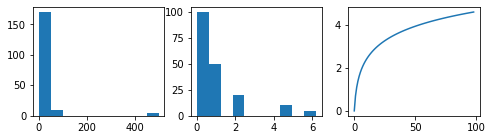

In [27]:
# (1) пример сжатия хвоста и как выглядит скорость роста логарифмической кривой
Y = 100 * [1] + 50 * [2] + 20 * [10] + 10 * [100] + 5 * [500]
Y_tr = np.log(Y); Y_log = np.log(np.arange(1, 100)) 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 2))
ax[0].hist(Y, bins=10); ax[1].hist(Y_tr, bins=10); ax[2].plot(Y_log); plt.show()

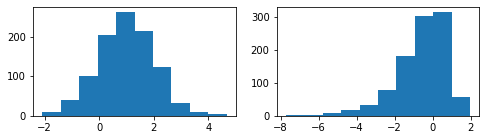

In [29]:
# (2) чистое логарифмирование не идеально выравнивает хвосты экспоненц распределение, 
# так как ЛОГАРИФМ УБЫВАЕТ ОЧЕНЬ БЫСТРО ПРИ Y->0 (образуется обратный хвост)
y_logn = np.random.lognormal(mean=1, sigma=1, size=1000)
y_exp = np.random.exponential(scale=1, size=1000)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
ax[0].hist(np.log(y_logn), bins=10); ax[1].hist(np.log(y_exp), bins=10); plt.show()

lambda = 0.26612198525253433


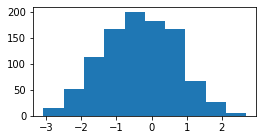

In [48]:
# (3) boxcox преобразование автоматически по likehood находит нужное lmbda (оно же p)
y_exp = np.random.exponential(scale=1, size=1000)
y_transform, lmbda = boxcox(y_exp); print(f'lambda = {lmbda}')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
ax.hist(y_transform); plt.show()

#### Метод максимального правдоподобия

https://www.youtube.com/watch?v=bxHHxNsnRQs&list=PLCf-cQCe1FRycw91L5669T4Krk7_sS9WY&index=5
  
<u>Описание метода</u>  
Пусть имеется совокупность X, хотим по случайной выборке Xn оценить неизвестный параметр tetta (статистику).  
То есть хотим получить tetta_est по выборке Xn такое чтобы оценка была    
ассимптотически несмещенной, состоятельной (сходилась по вероятности к tetta), эффективной  
  
Функция правдоподобия L = L(x1, ... xn, tetta) = вероятность извлечь данную выборку x1, ... xn  
из совокупности X, если бы у совокупности распределение частот было бы F = F(x, tetta).  
  
Метод максимального правдоподобия (ММП, MLE = max likelihood):  
Оценка tetta_est которая максимизирует правдоподобие L(x1, ... xn, tetta_est) -> max  
является оценкой для tetta, которая при достаточно общих условиях обладает ассимптотической  
несмещенностью, состоятельностью и эффективностью (последнее чуть реже). Об условиях см ниже.  
 
<u>Расчет функции правдоподобия</u>  
Пусть f(x, tetta) - плотность вероятности (или функция для дискретного распределения) получать x.  
Тогда L(x1, ... xn, tetta) = f(x1, ... xn | tetta) =  f(x1|tetta) * ... f(xn|tetta), т.к x1, ... xn - i.i.d  
Максимизация функции может выполняться через производную ее логарифма:  
d_lnL/d_tetta = grad(lnL) = 0 -> SUM(d_ln(f(xi)) / d_tetta) = 0 -> корень уравнения tetta_est.  
Если tetta = несколько статистик (например mu, std) -> решаем систему дифф уравнений относительно них.  
  
<u>Условия для получения хороших оценок по MLE</u>  
Для ассимптотической состоятельности tetta_est по MLE необходимы условия:  
- исходная совокупность имеет конечное tetta (например, распределение Коши не имеет матожидания)  
- функция ln(L) гладкая, имеет единственный глобальный максимум  
- функция L имеет предел при n->inf (это выполняется при выборке i.i.d и std<inf)  

На деле это выполняется в подавляющем большинстве случаев. Аналогично при широких допущениях  
выполняются условия ассимптотической несмещенности.  
  
<u>Оценка параметра p в схеме Бернулли через MLE</u>  
Распределение Бернулли, x = (1, 0) = (p, 1 - p). Хотим оценить p. Выборка x_pool = x1, ... xn  
f(1) = p; f(0) = 1 - p -> L = f(x1, ... xn | mu) = p^sum(x_pool) * (1 - p)^(n - sum(x_pool))  
Дальше делаем d(lnL)/dp = 0, долго решаем и получаем p_est = sum(x_pool)/n = среднее.  
Данная оценка - ассимптотически состоятельна для Бернулли.  
  
<u>Свойства оценок по MLE</u>  
- ассимптотическая состоятельность и несмещенность при широких условиях
- инвариантность, всегда (если tetta_est оценка для tetta, то g(tetta_est) - оценка для g(tetta))
- ассимптотическая нормальность
  
Ассимптотическая нормальность доказывается так. tetta_est - это корень уравнения grad(logL) = 0  
logL при больших n распределени нормально, как сумма логарифмов по отдельным семплам.  
Дальше мы можем разложить grad(logL) в ряд Тейлора вблизи 0 и получить формулу для tetta_est:  
tetta_est = func(gradlogL, grad2logL). Пренебрегая более старшими производными.  
Производные нормального распределения распределены нормально -> можно в итоге получить tetta_est ~ N  
причем можно показать что var(tetta_est) = func(grad2logL) -> усредняя по выборке как раз перейти к информации Фишера.  
  
<u>Ассимптотическое поведение правдоподобия</u>  
При n -> inf: L(x1, ... xn | tetta) -> 0 (падает вероятность получить конкретно такую комбинацию чисел в выборке)  
При этом вторая производная abs(grad2(L)) будет расти -> будет расти выпуклость функции L в районе экстремума.  
Значит, что дисперсия выборочной оценки tetta_est из уравнения grad(L) = 0 будет уменьшаться.  
Данное свойство отражает теорема Рао-Крамера: var(tetta_est) >= 1 / (n * -grad2L)  
  
<u>Информация Фишера</u>  
Правдоподобие L = L(x1, ... xn, tetta) зависит от нашей выборки. Фиксируем выборку x1, ... xn, тогда  
выборочное Ln = Ln(tetta). Тогда если данная Ln(tetta) имеет острый пик, значит небольшое изменение  
параметра tetta уже сильно сказывается на вероятности извлечь данную выборку x1, ... xn.  
Обратный крайний кейс: Ln(tetta) = const, значит данная выборка может быть получена при любых  
tetta, а значит выборка x1, ... xn содержит **мало информации** позволяющей судить о tetta.  
  
Как правило, с ростом выборки n, функция Ln(tetta) становится все более резкой вокруг максимума.  
Растет информативность нашей выборки.  
  
Уже знаем что logL = SUM(logL_i), где L_i = L(xi|tetta).  
L_i - вклад в функцию правдоподобия каждого нового наблюдения. Чем более оно выпуклое около максимума,  
тем более информативное, так как добавляет рост чувствительности в оценке максимума.  
I = -d^2(logL)/d_tetta2 = -grad2(L) - информация Фишера (вторая производная по правдоподобию семпла)  
Если tetta - вектор с несколькими статистиками, получаем матрицу I_ij = - d^2logL / d_tetta_i_tetta_j  
Для i.i.d выборки I(x1, ... xn) = sum(I(xi)) - так как адитивность log(L) и второй производной.  
Поэтому информация Фишера по выборке x1, ... xn это n * I(tetta) - где I(tetta) - ср инфа по одной точке.  
  
Среднее по выборке I(tetta) = I(f, tetta) = **ожидаемая** информация, которую вносит  
в правдоподобие среднее дополнительное наблюдение. Зависеть будет от модели f - вероятностного распределения.  
Ожидаемая информация I = насколько быстро с добавлением новых элементов в выборку уточняется наша оценка tetta  
для конкретных моделей распределения f(x, tetta)  
Скорость уточнения оценки = эффективность оценки на имеющихся данных. Информация Фишера позволяет  
искать эффективные оценки - неравенство Рао-Крамера. var(tetta_est) >= 1 / I(x1 ... xn) = 1 / I(tetta) * n.   
Для разных исходных tetta, I(tetta) разная -> на имеющейся выборке n точность оценок tetta_est будет разная.  
(!) Ожидаемая информация I(tetta) - это усредненная по всем выборкам информация. При численной оценке нужно семплирование.   
  
<u>Построение дов интервалов с MLE</u>  
Итак, выяснили что оценка по MLE это tetta_est которая максимизирует правдоподобие L.  
При этом для больших n tetta_est ассимптотически нормальная с распределением N(tetta_est, 1/I(tetta_est))  
Следует из ассимптотической сходимости var(tetta_est) к границе Рао-Крамера.  
Отсюда уже после рассчета I(tetta_est) легко найти дов интервалы для нужных значимостей.

In [72]:
# оцениваем информацию Фишера I aka вклад одного семпла в рост крутизны пика logL
# при накоплении кол-ва семплов n крутизна пика aka информативность = устойчивость оценок растет как n * I
I_exp_list = []
n = 5 # размер выборки
tetta = 0.8 # реальный параметр распределения
grad_step = 0.01
idx = np.argmin(np.abs(tetta_est - tetta)) # для оценки инфы Фишера в точке экстремума
for j in range(100):
    x = np.random.binomial(1, tetta, size = n) # схема бернулли
    tetta_est = np.arange(0.1, 1.05, grad_step) # диапазон оцениваемых tetta
    logL = n * np.mean(x) * np.log(tetta_est) + n * (1 - np.mean(x)) * np.log(1 - tetta_est)
    gradL = np.gradient(logL, grad_step)
    I_exp_pool = -np.gradient(gradL, grad_step) # выборочная вторая производная для оценки инфо Фишера
    I_exp_list.append(I_exp_pool[idx])
print(np.mean(I_exp_list) / n)

6.181307309991782


Абсолютное значение L ожидаемо падает с ростом n; градиент логарифма имеет экстремум в tetta


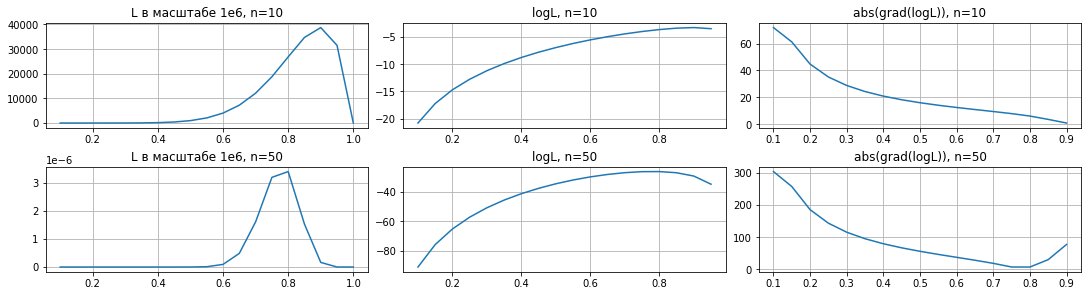

In [75]:
# Пример правдоподобия для схемы Бернулли
i = 0
ax = eda.get_subplots(size=(15, 4), rows=2, cols=3)
tetta = 0.8
print('Абсолютное значение L ожидаемо падает с ростом n; градиент логарифма имеет экстремум в tetta')
for n in (10, 50):
    
    x = np.random.binomial(1, tetta, size = n) # схема бернулли
    tetta_est = np.arange(0.1, 1.05, 0.05)
    
    # функция правдоподобия = вер-сть получить эту выборку при tetta = tetta_est (x1e6 для масштаба)
    L = [1e6 * (t ** (sum(x))) * ((1 - t) ** (n - sum(x))) for t in tetta_est]
        
    # аналитическая лог функция для праводоподобия
    logL = n * np.mean(x) * np.log(tetta_est) + n * (1 - np.mean(x)) * np.log(1 - tetta_est)
        
    # минимизируем для поиска оценки
    gradL = np.gradient(logL, 0.05)
    
    eda.make_plot('line', {'ax' : ax[i,0], 'x' : tetta_est, 'y' : L, 'title' : f'L в масштабе 1e6, n={n}'})
    eda.make_plot('line', {'ax' : ax[i,1], 'x' : tetta_est, 'y' : logL, 'title' : f'logL, n={n}'})
    eda.make_plot('line', {'ax' : ax[i,2], 'x' : tetta_est, 'y' : abs(gradL), 'title' : f'abs(grad(logL)), n={n}'})
    i+=1

#### Частотный и байесовский статистические подходы

https://education.yandex.ru/handbook/ml/article/bajesovskij-podhod-k-ocenivaniyu
https://ux-journal.ru/bayesian-testing.html

Классическая задача статистики - по имеющейся выборке Xn сделать вывод о генеральной совокупности X.  
Это могут быть закон распределения, параметры в законе и пр. Давайте считать что мы по выборке Xn пытаемся  
оценить параметр tetta = статистику по X (ср, дисперсию и пр). Пример: хотим оценить средний рост человека.  

  
<u>ДВА СТАТИСТИЧЕСКИХ ПОДХОДА</u>  
  
1. Частотный.  
X - неизвестный реальный ряд, не случ величина.    
f(x, tetta) - плотность вероятности - реальное распределение частот нахождения разных x внутри ряда X  
tetta = const - оцениваемый параметр распределения f(x, tetta) - не случ величина.  
Xn - <u>случайная</u> выборка элементов из X. Таким образом Xn - случ величина.  
Полагая tetta_est -> вероятность извлечения выборки Xn из распределения частот f(x, tetta_est)  
Это будет правдоподобием L = L(Xn, tetta_est). tetta_est = argmax(L).  
Выборочные частоты fn(x) при n -> inf сходятся к классическим f(x).  
По ЦПТ получим оценку tetta_est с хорошими асимптотическими свойствами.  
L = L(xn, tetta) -> случ величина; tetta_est = argmax(L(xn, tetta)) - тоже случайная величина.  
Соответственно получаем распределение tetta_est и ее интервальные оценки
  
  
2. Байесовский (вероятностный)  
Выборка Xn - не случайная величина, а фиксированная эмпирическая данность.  
tetta - <u>случайная величина</u>. Мы не знаем истинную функцию частот -> неопределенность = вероятность.  
Ген. совокупность X - тоже случайная, для выборки Xn возможны разные порождающие X с разными вероятностями.  
Для вычисления оценок tetta_est используется апостериорное распределение p(tetta | x1, ... xn)    
По формуле Байеса: p(tetta | Xn) = p(tetta) * p(Xn | tetta) / Const  
p(tetta) - априорное знание (начальное предположение о распределении tetta).  
p(Xn | tetta) - та же функция правдоподобия, что и в частотном подходе  
Для оценок tetta_est максимизация апостериорной вероятности по формуле Байеса приводит к  
аналогичной максимизации функции правдоподобия.
  
  
PS. Байесовский подход более интуитивен, так как мы в обычной жизни также обновляем нашу  
уверенность о некотором событии исходя из накапливаемого опыта.  

---  
<u>ПРИМЕР С ОЦЕНКОЙ РОСТА ЧЕЛОВЕКА</u>  
1. Частотный  
Есть все имеющиеся люди - X. Их средний рост tetta - конкретное число, неизвестное. F(X, tetta) - частоты.  
Отсюда знаю вероятности получать конкретные x - значения роста у случайного человека.  
Для выборки размера n знаю что по ЦПТ средневыборочное - <u>случайная величина</u> -   
будет распределена нормально. Из этого считаю доверительный интервал - это такие два числа, которые если  
я буду их считать по аналогичным выборкам много раз - в 95% случаях включают реальное tetta.  
  
  
2. Байесовский  
Есть люди - X, их средний рост (СВ) распределен как F(x, tetta) - это наша уверенность в том какой он.  
Без всяких априорных знаний F(x, tetta) = uniform(-inf, inf)    
Добавляем априорное знание: люди не выше 3 метров, рост не отрициательный: F = uniform(0, 3)  
Накапливаем выборку Xn, утоняем наши знания F -> F_next ... в конце приходим к более  
релевантному нашим знаниям распределению вероятностей = уверенностей в tetta.  
Пересчет F -> F_next построен на теореме Байеса и часто аналитически сложен.  
Здесь доверительный интервал - два числа, отсекающие 95% вероятностной массы финального F

---
<u>ТЕОРЕМА БАЙЕСА</u>  
Мы знаем что вероятность совместного наступления двух событий P(AB) = P(A|B) * P(B) = P(B|A) * P(A)  
Отсюда P(A|B) = P(B|A) * P(A) / P(B) = P(B|A) * P(A) / SUM(P(B|Ai) * P(Ai))  
Последняя сумма - это разложение P(B) по базису всех возможных предварительных событий Ai.  
  
Данная формула позволяет в оценке параметра по имеющимся данным переходить из априорного в апостериорную форму  
P(tetta|x) = P(x|tetta) * P(tetta) / Integral(p(x|tetta) * p(tetta) * d_tetta  
  
Теперь можно задать априорную форму распределения p(tetta) - наше суждение о распределении параметра  
без наличия информации из данных, посчитать правдоподобие, а также полное правдоподобие (интеграл) и  
получить формулу для вычисления апостериорного распределения для tetta.  
  
---
<u>АПРИОРНАЯ ИНФОРМАЦИЯ</u>  
Итак, для наших данных x и оцениваемого параметра tetta мы получили, что  
p(tetta|x) = p(x|tetta) * p(tetta) / p(x)  
Множитель p(x) по сути нормирует формулу приводя вероятность в диапазон 0, 1.  
При этом p(tetta) влияет на конечное значение p(tetta|x) - однако его влияние падает с ростом данных n.  
Это объясняется тем, что при n -> inf правдоподобие L = p(x|tetta) становится все более узким около   
реального tetta и статичный спектр p(tetta) перестает сильно влиять на форму итоговой кривой.  
  
Однако, на малых выборках вид кривой p(tetta) может сильно определять исходную апостериорную кривую.  

---
<u>ПРИМЕР С ВЕРОЯТНОСТЯМИ</u>  
Допустим у нас есть данные x = x1, .. xn и мы оцениваем параметр tetta.  
Хотим ответить на вопрос - какая вероятность что tetta > a? Т.е посчитать P(tetta>a|x)  
В частотном подходе: полагая tetta = const -> получаем распределение tetta_est(x1, ... xn).  
Но это распределение оценок при каком то tetta. Дов. интервалы - это случ числа такие, что  
в N% выборок x1 ... xn они накрывают реальное значение tetta. Про вероятность tetta ничего нет.  
  
А в байесовском подходе посчитаем прямо f(tetta) -> можно будет найти шанс что tetta > a.  

---
<u>РАБОТА С АПОСТЕРИОРНЫМИ РАСПРЕДЕЛЕНИЯМИ</u>  
Итак, мы ищем распределение f(tetta|x). Мы задали априорное распределение f_prior(tetta) и дальше считаем:  
f_posterior(tetta|x) = f(x|tetta) * f_prior(tetta) / Integral(f(x|t) f_prior(t) dt)  
Если интеграл считать оч сложно, то можно его отбросить, так как это константа не зависящая от tetta,  
и просто максимизировать функцию f(tetta|x) с точностью до множителя - при этом норм искать tetta_est.  
  
Aposterior_prob_hist = Likelihood * Aprior_prob_dist / Const  
ln(aposterior) = ln(likelihood) + ln(aprior)  
С ростом объема выборки вклад ln(likelihood) увеличивается по сравнению с априорным знанием  
(действительно для i.i.d ln(likelihood_n) = ln(likelihood_n-1) + ln(likelinooh_1)

---
Аналитически вычислять апостериорные распределения можно для узкого семейства функций вероятности.  
Например, для схемы бернулли или нормальных распределений. После вычисления можно получать формулу  
апостериорной вероятности наступления некоторого события при условии что произошли x1, x2 ... xn  
событий до этого (и смотреть динамику накопления).  
Пример: хотим оценивать вероятность поставить лайк коммменту при условии что ему уже поставили x лайков  
и y дизлайков. Априорное распределение f_apr = U(0, 1); правдоподобие через схему Бернулли,  
полное правдоподобие (знаменатель). - выражается через Бетта функцию. Для пары (x,y) можем легко  
получить f_aposterior -> дов интервалы, среднее и любые статистики.  
  
Если плотность вероятности имеет более сложный закон - то сложно интегрировать полное правдоподобие ->  
апостериорная вероятность с точностью до константы (полезно для точечных оценок, но не более того)  
  
<u>MCMC алгоритмы для семплирования апостериорной вероятности</u>  
https://www.youtube.com/watch?v=xTW-ysw0HIE&list=PLCf-cQCe1FRwiYgceWhZL3AkDhJzSLkEU&index=9  
MCMC = markov chain monte carlo.  
Итак, у нас есть выборка x1, ... xn  
Имеем статистику tetta, наше априорное знание о форме ее распределения f_prior(tetta)  
Likelihood = L(x|tetta) = f(x1|tetta) * ... * f(xn|tetta)  
Тогда f_posterior(tetta|x)  = L(x|tetta) * f_prior(tetta) / Integral(L(X|t) * f_prior(t) dt)  
Integral сложно посчитать аналитически и часто сложно посчитать эффективно численно.  
  
Альтернативный путь - симуляция через марковские цепи (**MCMC**)  
Введем функцию f_unnormalized_posterior = f_up = L(x|tetta) * f_prior(tetta)  
Тогда f_posterior = f_up / Integral(f_up(t) dt)  
Задаем изначальное tetta, инициируем список tetta_list - будущая цепь.  
Строим цепь Маркова: tetta' = prop(tetta) - см ниже, например tetta' = tetta + eps  
Вычисляем r = f_up(tetta') / f_up(tetta) - на сколько tetta' лучше tetta описывает ситуацию  
Добавляем tetta' в наш tetta_list с вероятностью p_add = min(1, r)  

Делаем следующий шаг итд - получаем tetta_list - цепь Маркова, где следующий шаг зависит только от предыдущего.  
tetta_list = tetta_list(N:) - отбрасываем первые значения (несколько тысяч для разогрева)  
остальное - и есть целевое распределение f_posterior(tetta) который хотим получить  
  
Proposal_function = prop(tetta) - правило по которому генерим следующее значение  
влияет на скорость сходимости алгоритма. tetta' = tetta + eps частный случай  
Если здесь ассиметричная функция - то MCMC надо модифицировать итд.  

Алгоритм сошелся к целевому распределению, когда получаемая цепь Маркова сошлась к стационарному ряду  
(см тетрадку Time Series)  
  
PS. Алгоритм построен на теореме о сходимости цепи Маркова.  
Пусть у нас есть возможные состояния y1, ... ym в которых может оказаться x на каждом шаге цепи.  
Пусть они как то вероятностно распределены p_y1, p_y2, ...  
Тогда если цепь не циклична, все состояния p_yi достижимы спустя сколько-то шагов из любых других состояний,  
то при n -> inf вероятность спустя столько шагов из x достигнуть yi сходится к p_yi.

---
<u>Байесовские методы и нейронные сети</u>  
https://habr.com/ru/companies/yandex/articles/321434/  
Нейронная сеть по сути это система, обладающая набором весов, которая принимает семплы и возвращает таргет.  
Задача обучения в классическом варианте - это задача поиска оптимальных весов на тренировочном датасете.  
В Байесовской парадигме можно представить ее так:  
-- у весов есть априорное распределение f_prior.  
-- правдоподобие - вероятность получить данные таргеты от датасета на данных весах  
-- мы ищем апостериор f_post - распределение вероятностей для весов при условии что получены train-таргеты.  
  
f_post ~ f_prior * likelyhood  
Кроме того возможен удобный стекинг моделей - когда f_post на выходе одной - это f_prior на вход другой.  
Модели как бы уточняют информацию касательно распределения вероятностей весов.  
Также задавая разный f_prior - возможно ввести регуляризацию нейросети, контролируя переобучения  
drop out метод (когда сигнал от нейрона берется с вероятностью p) - частный случай регуляризации  
Подробнее про классический стекинг см. в тетрадке "ML"  
  
При обучении байесовских моделей используется вариационные методы - это быстрее хоть и менее точно, чем  
вычислять f_post через MCMC или другие подобные методы. Пример вариационного приближения:  
пусть у нас f_post = f(w|D), w - веса модели, D - тренировочные данные = const.  
Пытаемся найти такую функцию f_post_aprox = f(w), чтобы div(f_post, f_post_aprox) -> 0 (близки).  
При этом f_post_aprox -известная аналитически функция, например нормальное распр N(mu1, ... std1, .. w1, ...)  
Варьируя mu-std параметры - ищем оптимум чтобы интегральное произведение по весам w было близко.  
  
div - мера расстояния между распределениями, т.е чем ближе f(x) к g(x) - тем ближе div(f,g) к нулю.  
Один из вариантов подобного расстояния - дивергенция Кульбака-Лейблера KL.  
KL = intergal(f * log(f / g) dx.  log(f / g) = log f - log g. То есть считается интегральная разница  
в логарифмическом масштабе - при этом множитель f - аналог веса, то есть оцениваем отличие g от f в лог  
машстабе в точках где существенное значение вероятности f. В данном случае мы проверяем насколько  
функция g аппроксимирует распределение f

#### Бутстрап

https://habr.com/ru/companies/X5Tech/articles/679842/  ; https://habr.com/ru/articles/762648/  
Имеем случайную величину X и хотим оценить ее статистику T = T(X) на генеральной совокупности.  
Нам доступна выборка Xn длины n из данной совокупности. Tn = T(Xn) - выборочная статистика.  
В общем случае мы можем не знать закона распределения T для случайной величины X.  
  
<u>Семплирование выборки</u>  
Xn -> X_s (случайная подвыборка длины Xn с возвращением, чтобы сохранять изначальное распределение) извлекается iter раз.  
При достаточно большом n выборка Xn репрезентативна X -> Ts = T(X_s) распределение проксирует закон распределения T.  
Это следует из ЦПТ. Если n слишком мало, то возникает кризис репрезентативности выборки.  
В итоге имея распределение Ts - мы можем получать оценки, например доверительные интервалы или квантили для оценки T.  
При малом n все многообразие генеральной совокупности X не будет захвачено - оценки могут получиться зауженными.  
Одна из проблем бутстрапа - плохая точность оценок старших квантилей - там мало данных.  
  
<u>Гиперпараметры бутстрапа</u>  
Два основных гиперпараметра - размер семлпируемой выборки s = len(Xs) и количество иттераций iter.  
Размер выборки максимально имеет смысл брать len(Xn) или меньше. При len(Xs) = len(Xn) можно показать, что  
в выборку Xs будут попадать примерно 63% всех элементов Xn (вероятность элемента не попасть в выборку (1-1/n)^n  
сходится к 1/e ~ 37%). Можно брать меньше, если выборка большая. Кол-во иттераций iter обычно 10^3-10^4  
от величины зависит точность перцентильных оценок -> устойчивость оцениваемых квантилей распределения.  
Чем выше (iter, s) при условии что s < len(Xn) - тем меньше дисперсия квантилей оценок. 
  
<u>Смещение на малых выборках</u>  
https://math.montana.edu/jobo/thainp/boot.pdf ; https://garstats.wordpress.com/2018/01/23/bias-correction/  
Итак, у нас есть исходная совокупность X и T = T(X) которую хотим оценить.  
Когда мы имеем выборку Xn то, в разных случаях это будет какое то (неизвестное нам) распределение Tn = T(Xn)  
и статистика Tn будет смещена от T на случайное delta = T - Tn. При больших n: delta ~ 0, но если n не достаточно большое  
(но при этом достаточное для ЦПТ) то Xn иногда будет смещенное на bias = T - Tn и все семплирования Ts также будут смещены.  
  
Если же семплировать выборки n и вычислять boot_bias = Ts - T(Xn), то получится смоделировать данное исходное смещение boot_delta ~ delta.  
Итак, систематическое смещение bias = T(Xn) - avg(Ts); тогда T_adj_s = Ts - bias = Ts - Tn + avg(Ts)  
Распределение T_adj_s центрируется на boot_delta и снижает смещение оценок. Имеет смысл при n < 100-200, дальше bias ~ 0.  

<u>Бутстрап Пуассона</u>  
https://www.unofficialgoogledatascience.com/2015/08/an-introduction-to-poisson-bootstrap26.html  
Хотим быстро семплировать с возвращением Xs из Xn где len(Xs) = len(Xn)  
Для выборки длины N элемент x появится в повторной выборке Xs: stats.binom.rvs(N, p=1/N) раз  
При N -> inf: stats.binom.rvs(N, 1/N) -> stats.poisson.rvs(mu=N * 1/N = 1)  
То есть при семплировании достаточно больших исходных выборок, можно осуществлять  
это семплирование поэлементно с весами Пуассоновского распределения.  
Само распределение можно обсчитать заранее и использовать для разных статистик.  
Т.е если у нас есть выборка Xn = a1 a2 a3 ... an, то можно ей противопоставить  
P = p1 p2 ... pn; pi = сколько раз в среднем в нашей выборке будет элемент i.  
Т.к mu=1 -> sum(P) ~ len(Xn); pi = веса каждого элемента в вычисляемой статистике.

In [173]:
# Пуассон vs Стандартный бутстрап. необходимые для сравнения метрики
metric_1 = np.random.normal(1, 1, 10**4); metric_2 = np.random.normal(4, 1, 10**4); n_iter = 10**4
# генерируем заранее пуассоновские веса
X1 = np.random.poisson(lam=1, size=(n_iter, len(metric_1))); X2 = np.random.poisson(lam=1, size=(n_iter, len(metric_2)))

In [181]:
# Пуассон vs Стандартный бутстрап. сравнение результатов
ht.bootstrap_calc(metric_1, metric_2, iter = n_iter)[0], ht.bootstrap_poisson_calc(metric_1, metric_2, n_iter, X1, X2)

((2.973293868920504, 3.0278056044237065), array([2.97286445, 3.05147821]))

In [175]:
%%timeit
ht.bootstrap_calc(metric_1, metric_2, iter=n_iter)

3.96 s ± 224 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [179]:
%%timeit
ht.bootstrap_poisson_calc(metric_1, metric_2, n_iter, X1, X2)

1.27 s ± 354 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
# Коррекция смещения на малых выборках
n = 1000 # при малых числах видна коррекция, при n>100-200 разницы почти нет
X, Y = np.random.normal(1, 1, n), np.random.normal(3, 1, n)
print(f'real mu diff = {np.mean(Y) - np.mean(X)}')
print(f'boot mu diff = {np.round(ht.bootstrap_calc(X, Y, stat_func=np.mean)[0], 4)}')
print(f'adj boot mu diff = {np.round(ht.bootstrap_calc(X, Y, stat_func=np.mean, adj_small=True)[0], 4)}')

real mu diff = 2.0110857208898487
boot mu diff = [1.9238 2.098 ]
adj boot mu diff = [1.9264 2.0995]


#### Корреляции

В разделе "Случайные величины" обсудили что для двух случайных величин X, Y:  
var(X + Y) = var(X) + var(Y) + 2 * M((X - M(X))(Y - M(Y)) = var(X) + var(Y) + 2 * cov(X, Y)  
cov - совместная вариация двух случайных величин  
Когда X, Y - независимы, M(X * Y) = M(X) * M(Y) -> cov(X, Y) = 0  
При этом обратное неверно: X, Y могут быть зависимы нелинейно, но линейная ковариация будет 0  

<u>Корреляция Пирсона</u>  
pearson_corr(X, Y) = cov(X, Y) / sqrt(var(X)var(Y)) - безразмерная величина, -1 <= pearson_corr <= 1  
Геометрическая интерпретация: X, Y - два случайных вектора, var(X) = |X|^2 ...  
Тогда pearson_corr = cos(alpha_X_Y) = (X, Y) / |X| * |Y|  
Выборочный коэффициент корреляции pearson_corr_pooled распределен по R-распределению Фишера  
Для больших n форма распределения медленно сходится к нормальной.  
  
<u>Корреляция Спирмена</u>  
Непараметрический ранговый аналог - spearman_corr(X, Y) = pearson_corr(R_x, R_y), где R - ранги случайных величин.  
Этот критерий поиска корреляции менее мощный (так как теряется часть информации), однако более устойчив  
к выбросам и отклонениям от строго линейной зависимости.  
Формула spearman_corr = func(n, dR); n, dR - размер выборки и разность рангов  
может быть получена из pearson_corr(R_x, R_y) если поработать с суммами рангов и квадратами значений.  
  
<u>Корреляция Кендалла</u>  
Аналог корреляции Спирмена, но построенный не на рангах, а на согласованности пар (что то вроде критерия знаков)  
Пары значений (x1, y1) и (x2, y2) считаются согласованными, если при x2>x1 следует y2>y1 и наоборот.  
С = кол-во конкордантных пар (то есть согласованных), D - кол-во дискордантных пар (обратно согласованных)  
kendall_corr = (C - D) / (C + D). Если зависимость монотонная, то либо D ~ 0 (возрастание) либо C ~ 0 (убывание)  
В этом случае kendall_corr = 1. Если зависимости нет, то C ~ D и коэффициент нулевой.  
Больше заточен на общую монотонность чем на линейную зависимость, обладает лучшей мощностью для малых выборок.  

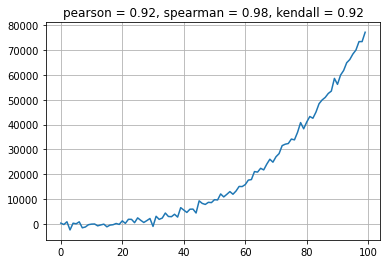

In [28]:
x = np.arange(100); y = 0.08 * x**3 + np.random.normal(0, 1000, len(x))
s, p, k = np.round((spearmanr(x, y).correlation, pearsonr(x, y)[0], kendalltau(x, y).correlation), 2)
eda.make_plot('line', {'x' : x, 'y' : y, 'title' : f'pearson = {p}, spearman = {s}, kendall = {k}'})

<u>Mutual information</u>  
https://www.kaggle.com/code/ryanholbrook/mutual-information  
(аналогичный материал есть в тетрадке ML в разделе с feature selection)  
    
---
При оценки приоритетов новых признаков - можно пробовать оценить насколько от данных признаков зависит таргет.  
Если зависимость отсутствует, то признак будет бесполезен для обучения модели.  
Коэф. корреляции полезен, но показывает только линейную взаимосвязь (частный случай)
  
Более общий инструмент - Mutual Information (MI) = насколько знание о переменной X увеличивает знание  
о переменной Y (общая функция взаимосвязи X, Y).  
MI = SUM_xy(p(x,y) * log(p(x,y)/p(x)p(y))   
Здесь p(x), p(y) - вероятности = частоты появления значений переменных x, y  
p(x,y) = частота появления пары x,y в датасете (= совместная вероятность)  
  
!!! Формула выводится из концепции MI = S(X) - S(X|Y) = чистая энтропия X - энтропия при условии Y.  
Т.е мы оцениваем как меняется мера информации, когда добавляем в систему знание про Y.
  
Реализация расчета MI в sklearn позволяет работать с дискретными и непрерывными величинами, эмулируя распределение вероятностей p(x, y). Оценку можно вести через kNN - находим для каждой точки K соседей, оцениваем в каком это  
радиусе - плотность po = 1/r (т е прям физически по плотности точек оцениваем распредление)  
PS. Если значения X - дискретные, то p(x,y) вычисляется прямо и здесь не нужен kNN.  
Для проблемы одинаковых расстояний в KNN используется случайный шум в X - поэтому для стабильного вывода надо фиксировать random_state. mutual_info_classif - для дискретного <u>таргета</u>,  
а mutual_info_regression для непрерывного. При этом в обеих сценариях X - может содержать непрерывные признаки.     Дискретность можно задавать через опцию  discrete_features  

<u>Применимость MI</u>  
1. MI помогает оценить изолированно информативность X для понимания Y (оценивает любые взаимосвязи)
2. При этом НЕ учитывает, что в связке X+Z+... могут иметь объясняющую способность для Y (MI = univariate)
3. В зависимости от модели признак может иметь разную значимость - не обязательно высокую (т.е MI = потенциал)

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
# генерация данных с разными зависимостями
y = np.random.choice([1,2,3,4, 5], 60, replace=True)
inc = np.random.choice([1, 2,3,4,5], 60, replace=True)
df = pd.DataFrame({'y' : y, 'x1' : y**2 + 15, 'x2': 2 * y + 13, 'x3' : y+inc, 'x4' : inc})
dfx = df.drop(columns='y')

# оценки через регрессию (непрерывный таргет) и классификацию (дискретный)
mi_regr = pd.DataFrame({'features' : dfx.columns, 'mi': mutual_info_regression(dfx, y, random_state=1)})
mi_class = pd.DataFrame({'features' : dfx.columns, 'mi': mutual_info_classif(dfx, y, random_state=1)})
display(HTML(f"<div style='display: flex;'><div style='margin-right: 20px;'>{mi_regr.to_html()}</div><div>{mi_class.to_html()}</div></div>"))

#### Регрессионный анализ

<u>Линейная регрессия*</u>  
Также см раздел про регрессию на страницу "Causal inference & AB"  

Y = A + BX + Err    
A, B - сдвиг и наклон кривой; Err - остатки (ошибка интерполяции кривой и данных)  
L = Loss_func(E) - функция потерь, минимизация которой и дает аппроксимацию A,B.  

Метод наименьших квадратов (OLS) минимизирует сумму квадратов остатков E = Y_approx - Y.  
График остатков позволяет судить насколько хорошо удалось провести аппроксимацию.   
Линейная регрессия сильно связана с понятием корреляции. Минимизация дает коэффициенты:  
$B = r_{xy} s_y s_x $  
$A = Y_m - B X_m $

R^2 = 1 - SS_err / SS_total - **коэффициент детерминации** для линейной модели.  
Объясняет какая доля собственной дисперсии признака "объяснена" моделью.  
SS = Sum Squares.  
SS_total - дисперсия Y относительно своего среднего.  
SS_err - сумма квадратов остатков типа (Y_estimate-Y)  
Можно показать, что R^2 = r_xy^2 

In [ ]:
import statsmodels.api as sm
# данные для однофакторного метода
x = np.array(range(1, 11))
y = 2 * x + 3
df = pd.DataFrame({'y' : y, 'x' : x})
X, Y = df['x'], df['y']
df['x'], df['y'] = X, Y
Y = Y.apply(lambda x: x + 1*np.random.randint(5)) # noise

X=sm.add_constant(X) # добавляем поиск ненулевого пересечения
result = sm.OLS(Y, X).fit()
print(result.summary())
# check coefs
df['x'], df['y']= X.x, Y 
df.plot.scatter(x='x', y='y')
plt.plot(df.x.values, result.params.x * df.x.values + result.params.const)
plt.title(f"""slope = {round(result.params.x,2)}, intersect = {round(result.params.const,2)}, R_sq = {round(result.rsquared, 3)}""")
plt.grid();

In [ ]:
text = f"""F = ss_explained / ss_not_explained
Значимость объясненной дисперсии остатков по F-критерию  pval={round(result.f_pvalue, 6)}
pval для t-теста проверки гипотезы равенства нулю параметров регрессии:
slope - {round(result.pvalues.x, 6)}, intersect - {round(result.pvalues.x, 6)}"""
print(text)

In [ ]:
# экстраполяция с погрешностями
x_for_predict = [3,4,5]
result.get_prediction(sm.add_constant(x_for_predict)).summary_frame(alpha=0.05)